# Pymaceuticals Inc.
---

### Analysis

Python Script that reflects information on the effectiveness of specific drug treatments on mice with cancer, applying statistical methods and graphics to aid in the report's understanding

As we can see from the data, from the Summary Statistics section, we have 9 different drug treatments, and a placebo, but we will be focusing on 4 drugs: Capomulin, Ramicane, Infubinol and Ceftamin.

From those 4 drugs, Capomulin is the most widely used, and Infubinol the least, but the variation in usage is not big.

We can also see that the sex of the mice is pretty evenly distributed, with 51% of test subjects being female and 49% male.

In the BoxPlot section we can see a good representation of the relation between Tumor Volume (mm3) and the drugs used, and from this data we can see that Capomulin and Ramicane usage seem to result in the lesser Tumor Volumes, and Infubinol and Ceftamin result in higher volums, with Infubinol having an outlier.

In the Line Plot section we can see a representation of how Capomulin treatment effectively reduced the Tumor Volume over a number of Timepoint observations in mouse l509.

And finally in the Correlation/Regression section we can see a scatter plot that relates the weight of the mice and the volume of the tumors, and with a correlation score of .84, we can say with confidence that there is a relation between the weight of the mice and how big their tumors will be.

So, conclusions we can take from this data observations can be:

- Both Capomulin and Ramicane seem to be the most effective drugs for cancer treatment, and they are also the ones with the higher number of observations, suggesting more confidence in results.
- The positive correlation between weight of mice and volume of tumors suggests that future results could control the weight of mice variable to get more standarization in results.



In [445]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
df.head(7)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28


In [446]:
# Checking the number of mice.

df["Mouse ID"].nunique()

249

In [447]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)
df[duplicate]



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [448]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#clean_df = df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False, inplace=False)
#clean_df

clean_df = df.loc[df['Mouse ID']!='g989']



In [449]:
# Checking the number of mice in the clean DataFrame.

clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [450]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sd = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.


drug_stats_df = pd.DataFrame({
                            "Mean Tumor Volume": mean, 
                            "Median Tumor Volume" : median, 
                            "Tumor Volume Variance" : variance, 
                            "Tumor Volume Std. Dev." : sd, 
                            "Tumor Volume Std. Err." : SEM})
drug_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [451]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_stats_agg_df = clean_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
drug_stats_agg_df


C:\Users\Aspire-PC\AppData\Local\Temp\ipykernel_11772\1487147067.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  drug_stats_agg_df = clean_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

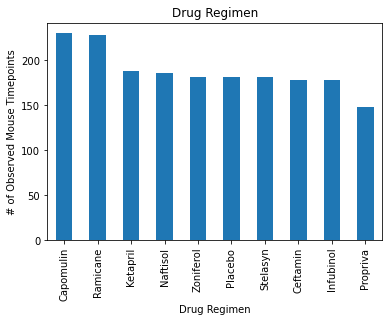

In [452]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_plot_data = clean_df.groupby("Drug Regimen").count()["Timepoint"]
bar_plot_data = bar_plot_data.sort_values(ascending = False)
bar_plot = bar_plot_data.plot(kind = "bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Regimen")
bar_plot

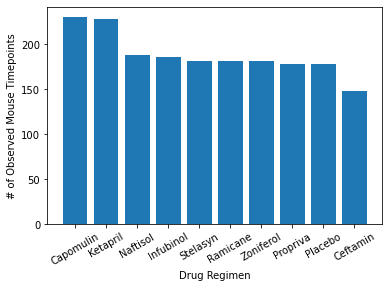

In [453]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_values = clean_df["Drug Regimen"].unique()
y_values = bar_plot_data
plt.bar(x_values, y_values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 30)
plt.show()

'\nbar_plot_data = clean_df.groupby("Drug Regimen").count()["Timepoint"]\nbar_plot_data = bar_plot_data.sort_values(ascending = False)\nbar_plot = bar_plot_data.plot(kind = "bar")\nplt.ylabel("# of Observed Mouse Timepoints")\nplt.title("Drug Regimen")\nbar_plot\n'

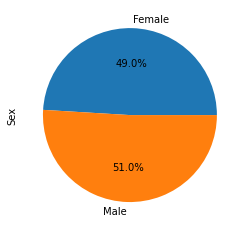

In [454]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot_data = clean_df.groupby("Sex").count()["Mouse ID"]
pie_plot = pie_plot_data.plot(kind = "pie", autopct = "%1.1f%%")
pie_plot.set_ylabel("Sex")




'''
bar_plot_data = clean_df.groupby("Drug Regimen").count()["Timepoint"]
bar_plot_data = bar_plot_data.sort_values(ascending = False)
bar_plot = bar_plot_data.plot(kind = "bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Regimen")
bar_plot
'''

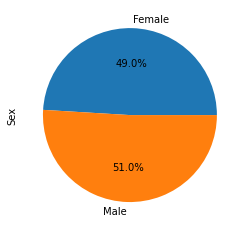

In [455]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
plt.pie(pie_plot_data, labels = labels, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [456]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_df = pd.merge(max_timepoint.reset_index(), clean_df, on=["Mouse ID", "Timepoint"], how = "left")
merged_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [457]:
# Put treatments into a list for for loop (and later for plot labels)
treatments  = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_df.loc[merged_data_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_vol_data_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
   
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

Text(0, 0.5, 'Final Tumor Volume (mm3)')

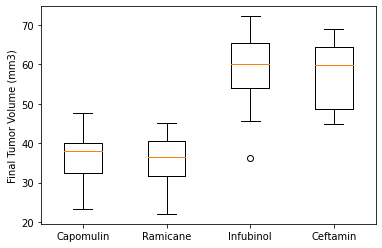

In [458]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data_list, labels = treatments)
ax1.set_ylabel("Final Tumor Volume (mm3)")



## Line and Scatter Plots

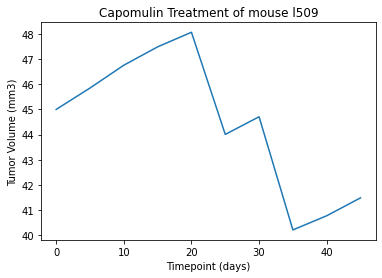

In [459]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
capomulin_data_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_data_df.loc[capomulin_data_df["Mouse ID"] == mouse_id]

line_plot_data_x = mouse_data["Timepoint"]
line_plot_data_y = mouse_data["Tumor Volume (mm3)"]


plt.plot(line_plot_data_x, line_plot_data_y)
plt.title(f"Capomulin Treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



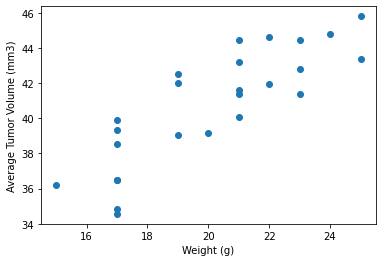

In [460]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
tumor_vol_ave = capomulin_data_df.groupby(["Mouse ID"]).mean()

scatter_plot_data_x = tumor_vol_ave["Weight (g)"]
scatter_plot_data_y = tumor_vol_ave["Tumor Volume (mm3)"]


plt.scatter(scatter_plot_data_x, scatter_plot_data_y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



The correlation between mouse weight and the average tumor volume is 0.84


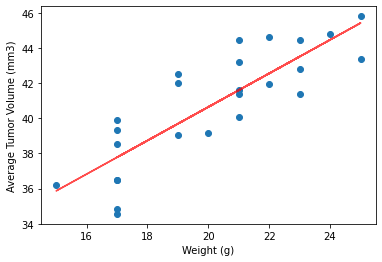

In [474]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


capomulin_data_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
tumor_vol_ave = capomulin_data_df.groupby(["Mouse ID"]).mean()

scatter_plot_data_x = tumor_vol_ave["Weight (g)"]
scatter_plot_data_y = tumor_vol_ave["Tumor Volume (mm3)"]


correlation = st.pearsonr(scatter_plot_data_x, scatter_plot_data_y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_plot_data_x, scatter_plot_data_y)
regression = slope * scatter_plot_data_x + intercept



plt.scatter(scatter_plot_data_x, scatter_plot_data_y)
plt.plot(scatter_plot_data_x, regression, color = "red", alpha = 0.7)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot()

plt.show()
